In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
import glob
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

# Feature Extraction

### Load Data

In [2]:
vehicles_filenames = glob.glob('data/vehicles/*/*.png')
non_vehicles_filenames = glob.glob('data/non-vehicles/*/*.png')
print("Number of Vehicles Images: {}".format(len(vehicles_filenames)))
print("Number of Non-Vehicles Images: {}".format(len(non_vehicles_filenames)))

Number of Vehicles Images: 8792
Number of Non-Vehicles Images: 8968


### Data Visualization

In [3]:
random_vehicle_index = np.random.randint(0, len(vehicles_filenames))
random_non_vehicle_index = np.random.randint(0, len(non_vehicles_filenames))

vehicle_example = cv2.imread(vehicles_filenames[random_vehicle_index])
vehicle_example = cv2.cvtColor(vehicle_example, cv2.COLOR_BGR2RGB)
non_vehicle_example = mpimg.imread(non_vehicles_filenames[random_non_vehicle_index])
non_vehicle_example = cv2.cvtColor(non_vehicle_example, cv2.COLOR_BGR2RGB)

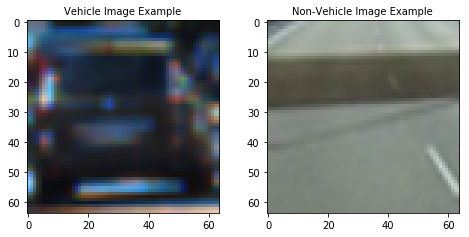

In [4]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 9))
f.tight_layout()
ax1.imshow(vehicle_example)
ax1.set_title('Vehicle Image Example', fontsize=10)
ax2.imshow(non_vehicle_example)
ax2.set_title('Non-Vehicle Image Example', fontsize=10)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Pipiline Definition

### Bin Spatial

In [5]:
# Resize images to 32x32 pixels
def bin_spatial(img, size=(32, 32), vis=False):
    
    if not vis:
        # Use cv2.resize().ravel() to create the feature vector
        features = cv2.resize(img, size).ravel() 
        # Return the feature vector
        return features
    else:
        img = cv2.resize(img, size)
        features = img.ravel() 
        #Return the feature vector and the image for visualization
        return features, img

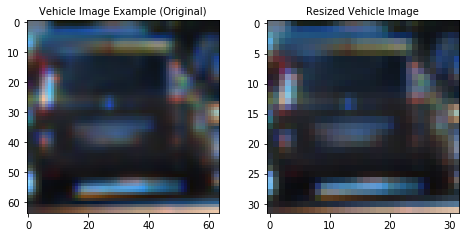

In [6]:
_, vehicle_example_bin = bin_spatial(vehicle_example, vis=True)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 9))
f.tight_layout()
ax1.imshow(vehicle_example)
ax1.set_title('Vehicle Image Example (Original)', fontsize=10)
ax2.imshow(vehicle_example_bin)
ax2.set_title('Resized Vehicle Image', fontsize=10)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### Color Histogram 

In [24]:
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(img[:,:,0], nbins, bins_range)
    ghist = np.histogram(img[:,:,1], nbins, bins_range)
    bhist = np.histogram(img[:,:,2], nbins, bins_range)
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:] + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features

Text(0.5,1,'B Histogram')

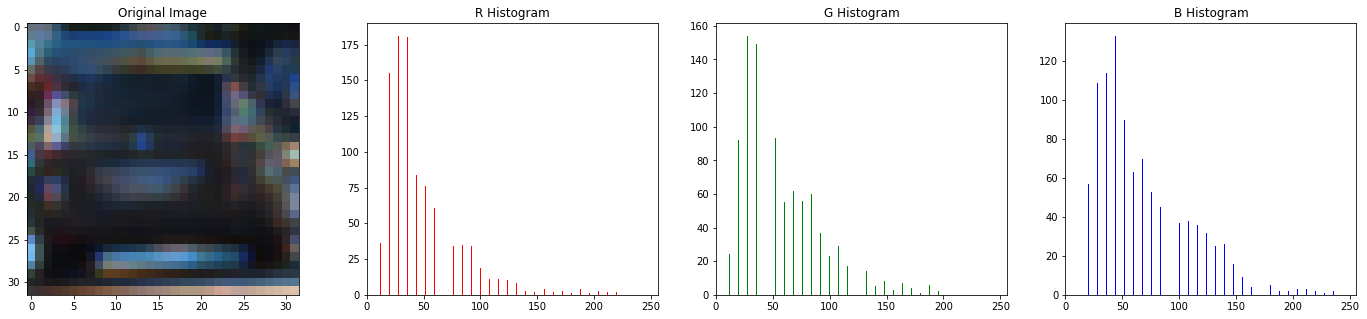

In [35]:
rhist, ghist, bhist, bin_centers, hist_features = color_hist(vehicle_example_bin)


# Plot a figure with all three bar charts
fig = plt.figure(figsize=(24,5))
plt.subplot(141)
plt.imshow(vehicle_example_bin)
plt.title('Original Image')
plt.subplot(142)
plt.bar(bin_centers, rhist[0], color='r')
plt.xlim(0, 256)
plt.title('R Histogram')
plt.subplot(143)
plt.bar(bin_centers, ghist[0], color='g')
plt.xlim(0, 256)
plt.title('G Histogram')
plt.subplot(144)
plt.bar(bin_centers, bhist[0], color='b')
plt.xlim(0, 256)
plt.title('B Histogram')